In [1]:
import torch
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.calibration import calibration_curve


In [21]:
data_name = 'tox21'
result_path = f'../output/{data_name}/Uni-Mol/FocalLoss/seed-0/preds/0.pt'
result_path1 = f'../output/{data_name}/Uni-Mol/none/seed-0/preds/0.pt'
result_path2 = f'../output/{data_name}/Uni-Mol/TemperatureScaling/seed-0/preds/0.pt'

In [22]:
results = torch.load(result_path)
results1 = torch.load(result_path1)
results2 = torch.load(result_path2)

In [23]:
lbs = results['lbs']
masks = results['masks']
bool_masks = masks.astype(bool)
preds = results['preds']['preds']
preds1 = results1['preds']['preds']
preds2 = results2['preds']['preds']

In [24]:
lbs = lbs[bool_masks]
preds = preds[bool_masks]
preds1 = preds1[bool_masks]
preds2 = preds2[bool_masks]

In [25]:
y, x = calibration_curve(lbs, preds, n_bins=15)
y1, x1 = calibration_curve(lbs, preds1, n_bins=15)
y2, x2 = calibration_curve(lbs, preds2, n_bins=15)

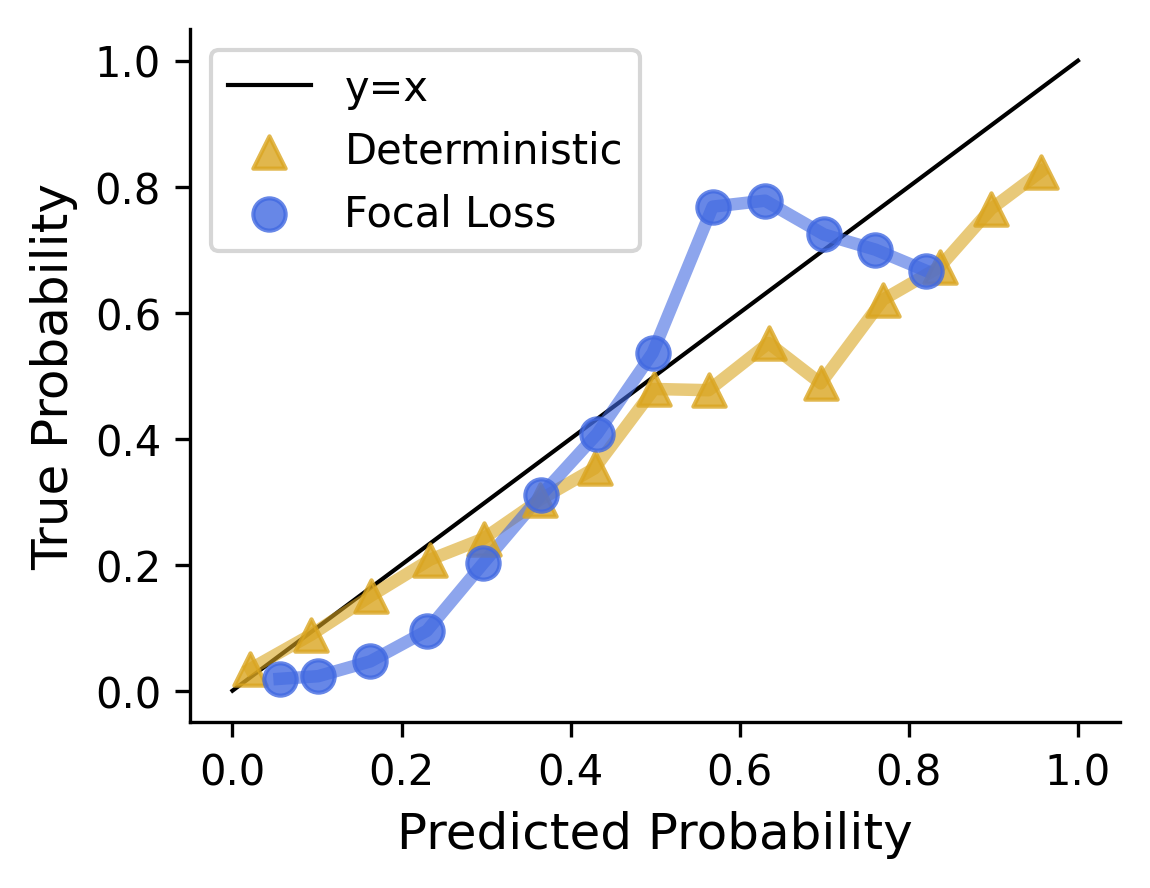

In [26]:
# Say, "the default sans-serif font is COMIC SANS"
# matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
# Then, "ALWAYS use sans-serif fonts"
# matplotlib.rcParams['font.family'] = "sans-serif"

fig, ax = plt.subplots(figsize=(4,3), dpi=300)

ref_x = np.linspace(0, 1, 100)

ax.plot(ref_x, ref_x, color='black', alpha=1, linewidth=1, zorder=10, label="y=x")
ax.plot(x1, y1, color='goldenrod', alpha=0.6, linewidth=3, zorder=10)
ax.scatter(x1, y1, color='goldenrod', marker='^', s=60, alpha=0.8, zorder=100, label="Deterministic")
ax.plot(x, y, color='royalblue', alpha=0.6, linewidth=3, zorder=10)
ax.scatter(x, y, color='royalblue', s=60, alpha=0.8, zorder=100, label="Focal Loss")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Predicted Probability', fontsize=12)
ax.set_ylabel('True Probability', fontsize=12)
plt.legend()

f_name = f's5.focal.cal.{data_name}.pdf'
fig.savefig(f_name, bbox_inches='tight')